In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from iminuit import Minuit
import sys
from distfit import distfit
plt.rcParams.update({'font.size': 18})

In [2]:
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

## Distributions fits 

In [3]:
#functions
def func_gaussian(x, N, mu, sigma) :
    return N * stats.norm.pdf(x, mu, sigma)
def func_gamma(x, N, a,loc,scale): 
    return N *stats.gamma.pdf(x,a,loc,scale)
def func_expon(x,N, loc, scale):
    return N*stats.expon.pdf(x, loc, scale)
#find distributions
def find_dis(dis):
    # Initialize distfit
    dist = distfit()
    # Determine best-fitting probability distribution for data
    dist.fit_transform(dis)
    dist.plot()

In [18]:
#example 1
mean = 53
num =10000
std = 3
Nbins = 15
random_gaussian = stats.norm.rvs(loc=mean, scale=std,size=num) 

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0007624] [loc=52.994 scale=2.988]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.1627208] [loc=42.197 scale=10.797]
[distfit] >[pareto    ] [0.37 sec] [RSS: 0.1793038] [loc=-0.118 scale=42.315]
[distfit] >[dweibull  ] [0.17 sec] [RSS: 0.0082388] [loc=53.082 scale=2.556]
[distfit] >[t         ] [0.26 sec] [RSS: 0.0007624] [loc=52.994 scale=2.987]
[distfit] >[genextreme] [0.91 sec] [RSS: 0.0012251] [loc=51.889 scale=2.980]
[distfit] >[gamma     ] [0.11 sec] [RSS: 0.0007593] [loc=-2004.581 scale=0.004]
[distfit] >[lognorm   ] [0.68 sec] [RSS: 0.0007600] [loc=-57.325 scale=110.268]
[distfit] >[beta      ] [0.33 sec] [RSS: 0.0007596] [loc=-1865.027 scale=17605.839]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.1125351] [loc=42.197 scale=21.356]
[distfit] >[loggamma  ] [0.32 sec] [RSS: 0.0008092] [loc=-566.686 scale=90.814]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


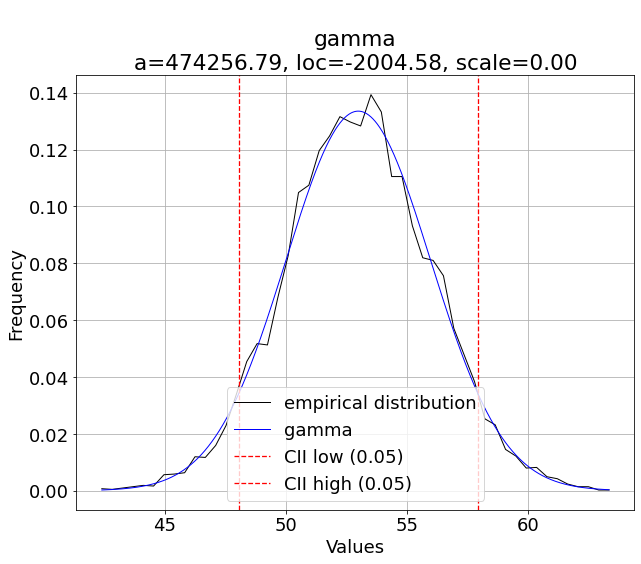

In [19]:
find_dis(random_gaussian)

In [20]:
#parameters
xmin = min(random_gaussian)
xmax = max(random_gaussian) 
counts, bin_edges = np.histogram(random_gaussian, bins=Nbins)
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
x = bin_centers[counts>0]
y = counts[counts>0]
s_counts = np.sqrt(counts)
sy = s_counts[counts>0]

In [21]:
#iminuit fit 
chi2_gaussian = Chi2Regression(func_gaussian, x, y, sy)
chi2_gaussian.errordef = 1
#find paramaters
minuit_gaussian = Minuit(chi2_gaussian, N=1000, mu=np.mean(random_gaussian), sigma=np.std(random_gaussian,ddof=1))  #      
# Perform the actual fit
minuit_gaussian.migrad()
    

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.57                      │              Nfcn = 65               │
│ EDM = 8.88e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │  14.23e3  │  0.14e3   │            │            │         │         │       │
│ 1 │ mu    │  52.992   │   0.030   │            │            │         │         │       │
│ 2 │ sigma │   3.022   │   0.023   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        N       mu    sigma │
├───────┼────────────────────────────┤
│     N │ 2.03e+04  0.00113   0.0119 │
│    mu │  0.00113 0.000919 1.57e-05 │
│ sigma │   0.0119 1.57e-05 0.000506 │
└───────┴────────────────────────────┘

In [22]:
Chi2_gau = minuit_gaussian.fval
Ndof_gau = len(x) -  len(minuit_gaussian.values[:])   
Ndof_gau, Chi2_gau
Prob_gau = stats.chi2.sf(Chi2_gau, Ndof_gau)

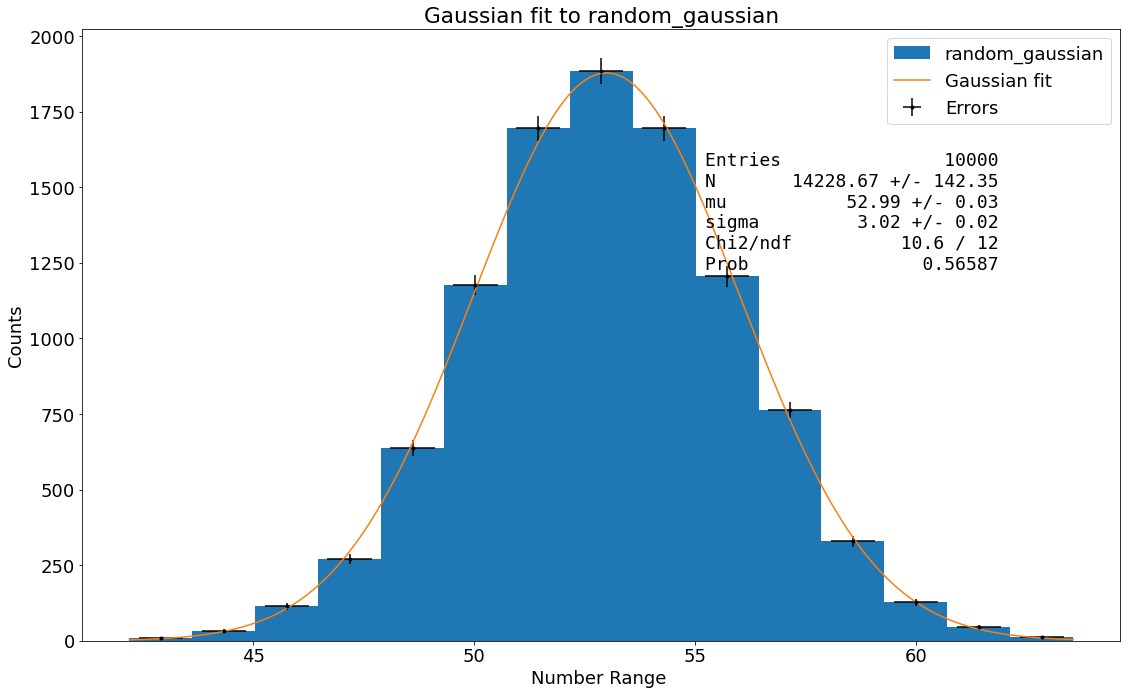

In [23]:
#plot
#plot parameters 
xaxis = np.linspace(xmin, xmax, 1000)
yaxis = func_gaussian(xaxis, *minuit_gaussian.values[:])

#figure
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(random_gaussian,bins=Nbins,label='random_gaussian')
ax.errorbar(x, y, yerr=sy, xerr=0.5, label='Errors', fmt='.k',  ecolor='k', elinewidth=1.5, capthick=2)
ax.plot(xaxis, yaxis, label=f'Gaussian fit')
ax.set(xlabel='Number Range ', ylabel='Counts',title='Gaussian fit to random_gaussian')
#iminuit legend

names = ['Entries','N','mu', 'sigma', 'Chi2/ndf', 'Prob']
values = ["{:d}".format(len(random_gaussian)),
              "{:.2f} +/- {:.2f}".format(minuit_gaussian.values['N'], minuit_gaussian.errors['N']),
              "{:.2f} +/- {:.2f}".format(minuit_gaussian.values['mu'], minuit_gaussian.errors['mu']),
              "{:.2f} +/- {:.2f}".format(minuit_gaussian.values['sigma'], minuit_gaussian.errors['sigma']),
              "{:.1f} / {:d}".format(Chi2_gau, Ndof_gau),
              "{:.5f}".format(Prob_gau),
              ]
d={}
for n,v in zip(names,values):
    d[n]=v

ax.text(0.60, 0.80, nice_string_output(d, 0), family='monospace', 
        transform=ax.transAxes, fontsize=18, color='black', verticalalignment='top')

fig.tight_layout()
ax.legend()
plt.show()

In [38]:
#example2 
mu_poiss = 1    # Average arrival time 1
N_size = 100000
poiss_rand = stats.poisson.rvs(size=10000,mu = mu_poiss)    


xmin = min(poiss_rand)
xmax = max(poiss_rand) 

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 13.2978547] [loc=1.025 scale=1.004]
[distfit] >[expon     ] [0.00 sec] [RSS: 12.1048322] [loc=0.000 scale=1.025]
[distfit] >[pareto    ] [0.24 sec] [RSS: 11.2408980] [loc=-0.806 scale=0.806]
[distfit] >[dweibull  ] [0.61 sec] [RSS: 11.8861008] [loc=1.000 scale=1.134]
[distfit] >[t         ] [0.17 sec] [RSS: 13.2880574] [loc=0.966 scale=0.919]
[distfit] >[genextreme] [1.04 sec] [RSS: 15.5312453] [loc=0.000 scale=0.000]
[distfit] >[gamma     ] [0.38 sec] [RSS: 11.5422412] [loc=-0.000 scale=0.664]
[distfit] >[lognorm   ] [0.62 sec] [RSS: 15.3730946] [loc=-0.000 scale=0.000]
[distfit] >[beta      ] [0.67 sec] [RSS: 10.4051961] [loc=-0.000 scale=18.616]
[distfit] >[uniform   ] [0.00 sec] [RSS: 14.5139776] [loc=0.000 scale=7.000]
[distfit] >[loggamma  ] [0.32 sec] [RSS: 13.3068364] [loc=-287.422 scale=39.446]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


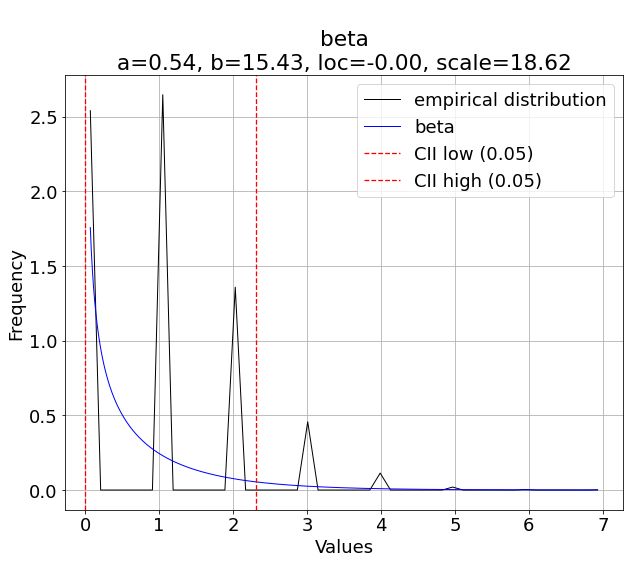

In [40]:
#find distribution 
find_dis(poiss_rand)

In [41]:
#fit a gamma distribution
#parameters
func_expon(x,N, loc, scale)
counts, bin_edges = np.histogram(poiss_rand, bins=xmax)
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
x = bin_centers[counts>0]
y = counts[counts>0]
s_counts = np.sqrt(counts)
sy = s_counts[counts>0]

In [37]:
#iminuit fit 
#func_gamma(x, N, a,loc,scale)
chi2_gamma = Chi2Regression(func_gamma, x, y, sy)
chi2_gaussian.errordef = 1
#find paramaters
minuit_gaussian = Minuit(chi2_gamma, N=500, a = 3., loc=19,scale=0.086)  #      
# Perform the actual fit
minuit_gaussian.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1e+04                      │              Nfcn = 140              │
│ EDM = 0 (Goal: 0.0002)           │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │   Hesse FAILED   │APPROXIMATE│NOT pos. def.│ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │    5e2    │    0e2    │            │            │         │         │       │
│ 1 │ a     │     3     │     0     │            │            │         │         │       │
│ 2 │ loc   │   1.9e1   │   0.0e1   │            │            │         │         │       │
│ 3 │ scale │  8.6e-2   │  0.0e-2   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘